In [2]:
import os.path as osp
import os
import matplotlib.pylab as plt
from tf_lab.icml.ae_farm_helper import relevant_class

In [3]:
%matplotlib inline

In [8]:
top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/'
ae_loss = 'emd'


top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/'


experiments_names = [name for name in os.listdir(top_in_dir)]
experiments_dir = [osp.join(top_in_dir, name) for name in os.listdir(top_in_dir)]


print experiments_names
# print experiments_dir

['0.0', '-0.9', '0.9', '0.1', '-0.1', '-0.5', '0.2', '0.5', '-0.2']
['/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/0.0', '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/-0.9', '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/0.9', '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/0.1', '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/-0.1', '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/nb_gan_ae_12_emd_chair_2048_best_epoch/-0.5', '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/momentum_search/

In [11]:
prefix = 'nb_gan_ae_'
ae_name_to_id = lambda ae_name: int(ae_name[len(prefix):len(prefix)+2])
epochs_used = [1, 3, 10, 30, 100, 300, 400, 500]

In [12]:
stats = dict()

for ex_dir, ex_name in zip(experiments_dir, experiments_names):    
    jsd_file = osp.join(ex_dir, 'jsd_stats.txt')
    d[ex_name] = []
    with open(jsd_file, 'r') as fin:        
        fin.readline ()  # first line is comment.
        for line in fin:
            meas = float(line.rstrip().split(' ')[2])
            d[ex_name].append(meas)

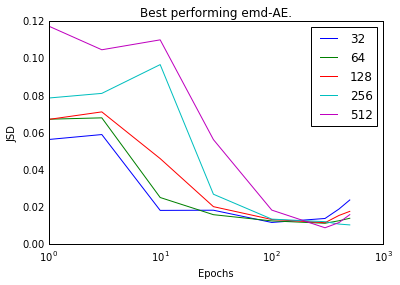

In [13]:
keys = sorted(stats.keys())
for name in keys:
    plt.semilogx(epochs_used, stats[name])
    
plt.legend(keys)
plt.title('Momentum effect on NB-gan with %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.grid(True)
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')